In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascular.txt to cardiovascular.txt


In [ ]:
df=pd.read_csv('cardiovascular.txt',delimiter=';')

In [ ]:
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
df.tail()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [ ]:
df.describe()

,ind,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
df.shape


(462, 11)

In [ ]:
df['famhist'].replace({'Present':1,'Absent':0},inplace=True)

In [ ]:
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    int64  
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 39.8 KB


In [ ]:
df.isnull().sum()

ind          0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [ ]:
df.columns

Index(['ind', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

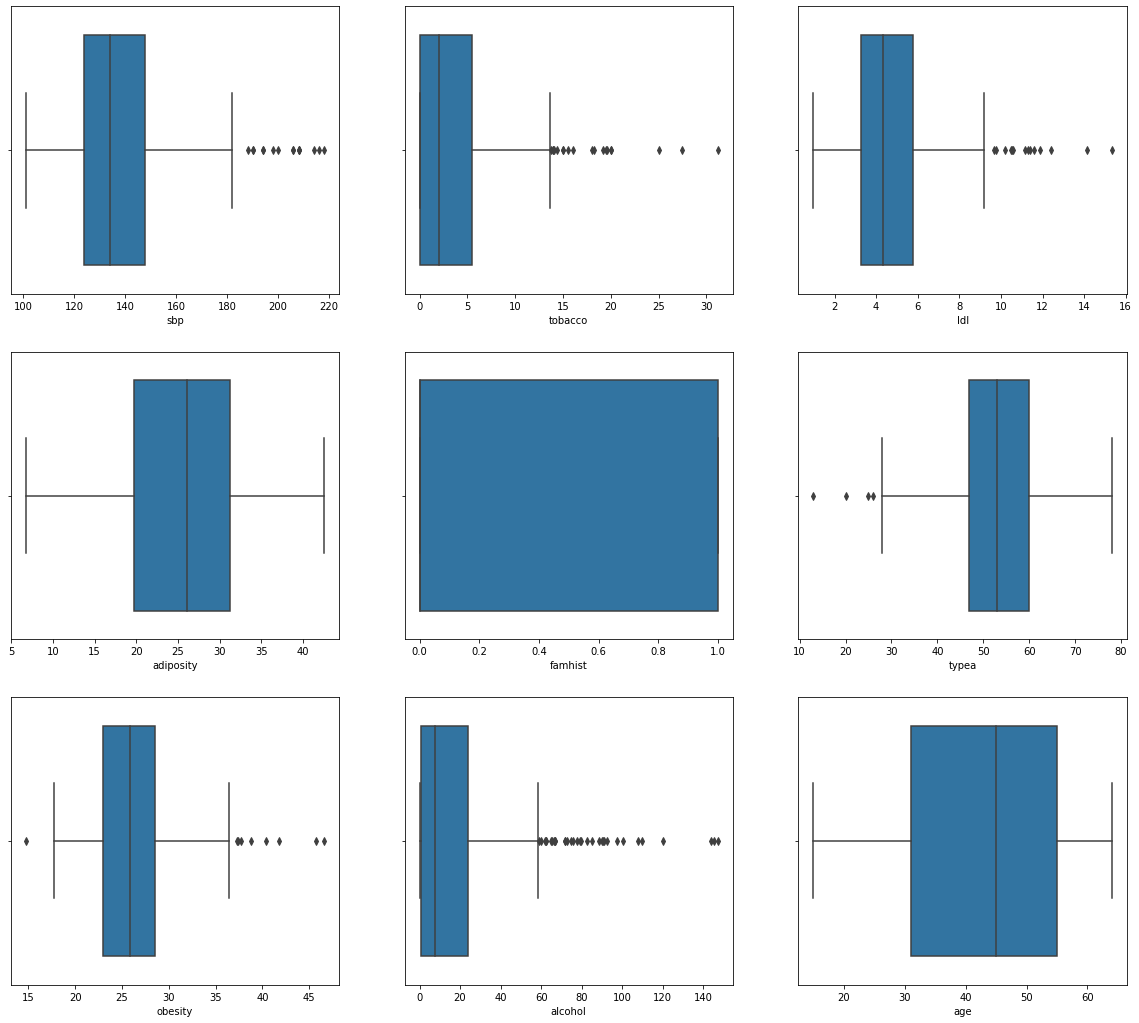

In [ ]:
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.boxplot(x=df['sbp'], data=df)

plt.subplot(3,3,2)
sns.boxplot(x=df['tobacco'], data=df)

plt.subplot(3,3,3)
sns.boxplot(x=df['ldl'], data=df)

plt.subplot(3,3,4)
sns.boxplot(x=df['adiposity'], data=df)

plt.subplot(3,3,5)
sns.boxplot(x=df['famhist'], data=df)

plt.subplot(3,3,6)
sns.boxplot(x=df['typea'], data=df)

plt.subplot(3,3,7)
sns.boxplot(x=df['obesity'], data=df)

plt.subplot(3,3,8)
sns.boxplot(x=df['alcohol'], data=df)

plt.subplot(3,3,9)
sns.boxplot(x=df['age'], data=df)



In [ ]:
features=['ind', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd']

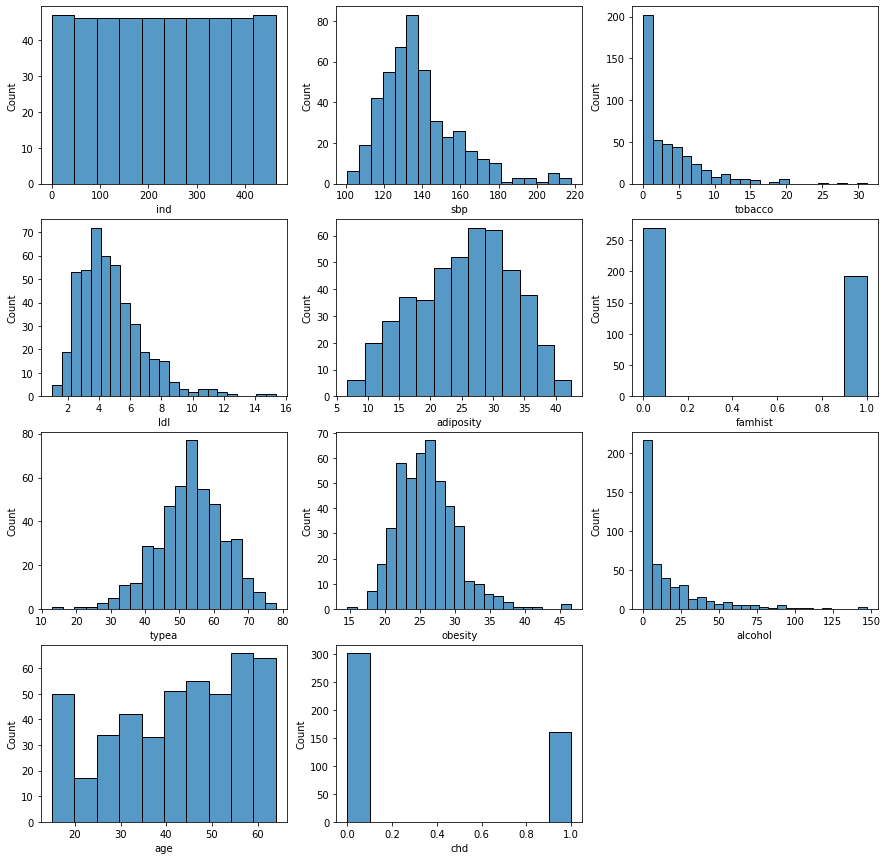

In [ ]:
list(enumerate(features))

plt.figure(figsize=(15,15))
plt.tick_params(labelbottom=False)
for i in enumerate(features):
  x=plt.subplot(4,3,i[0]+1)
  sns.histplot(data=df,x=i[1])

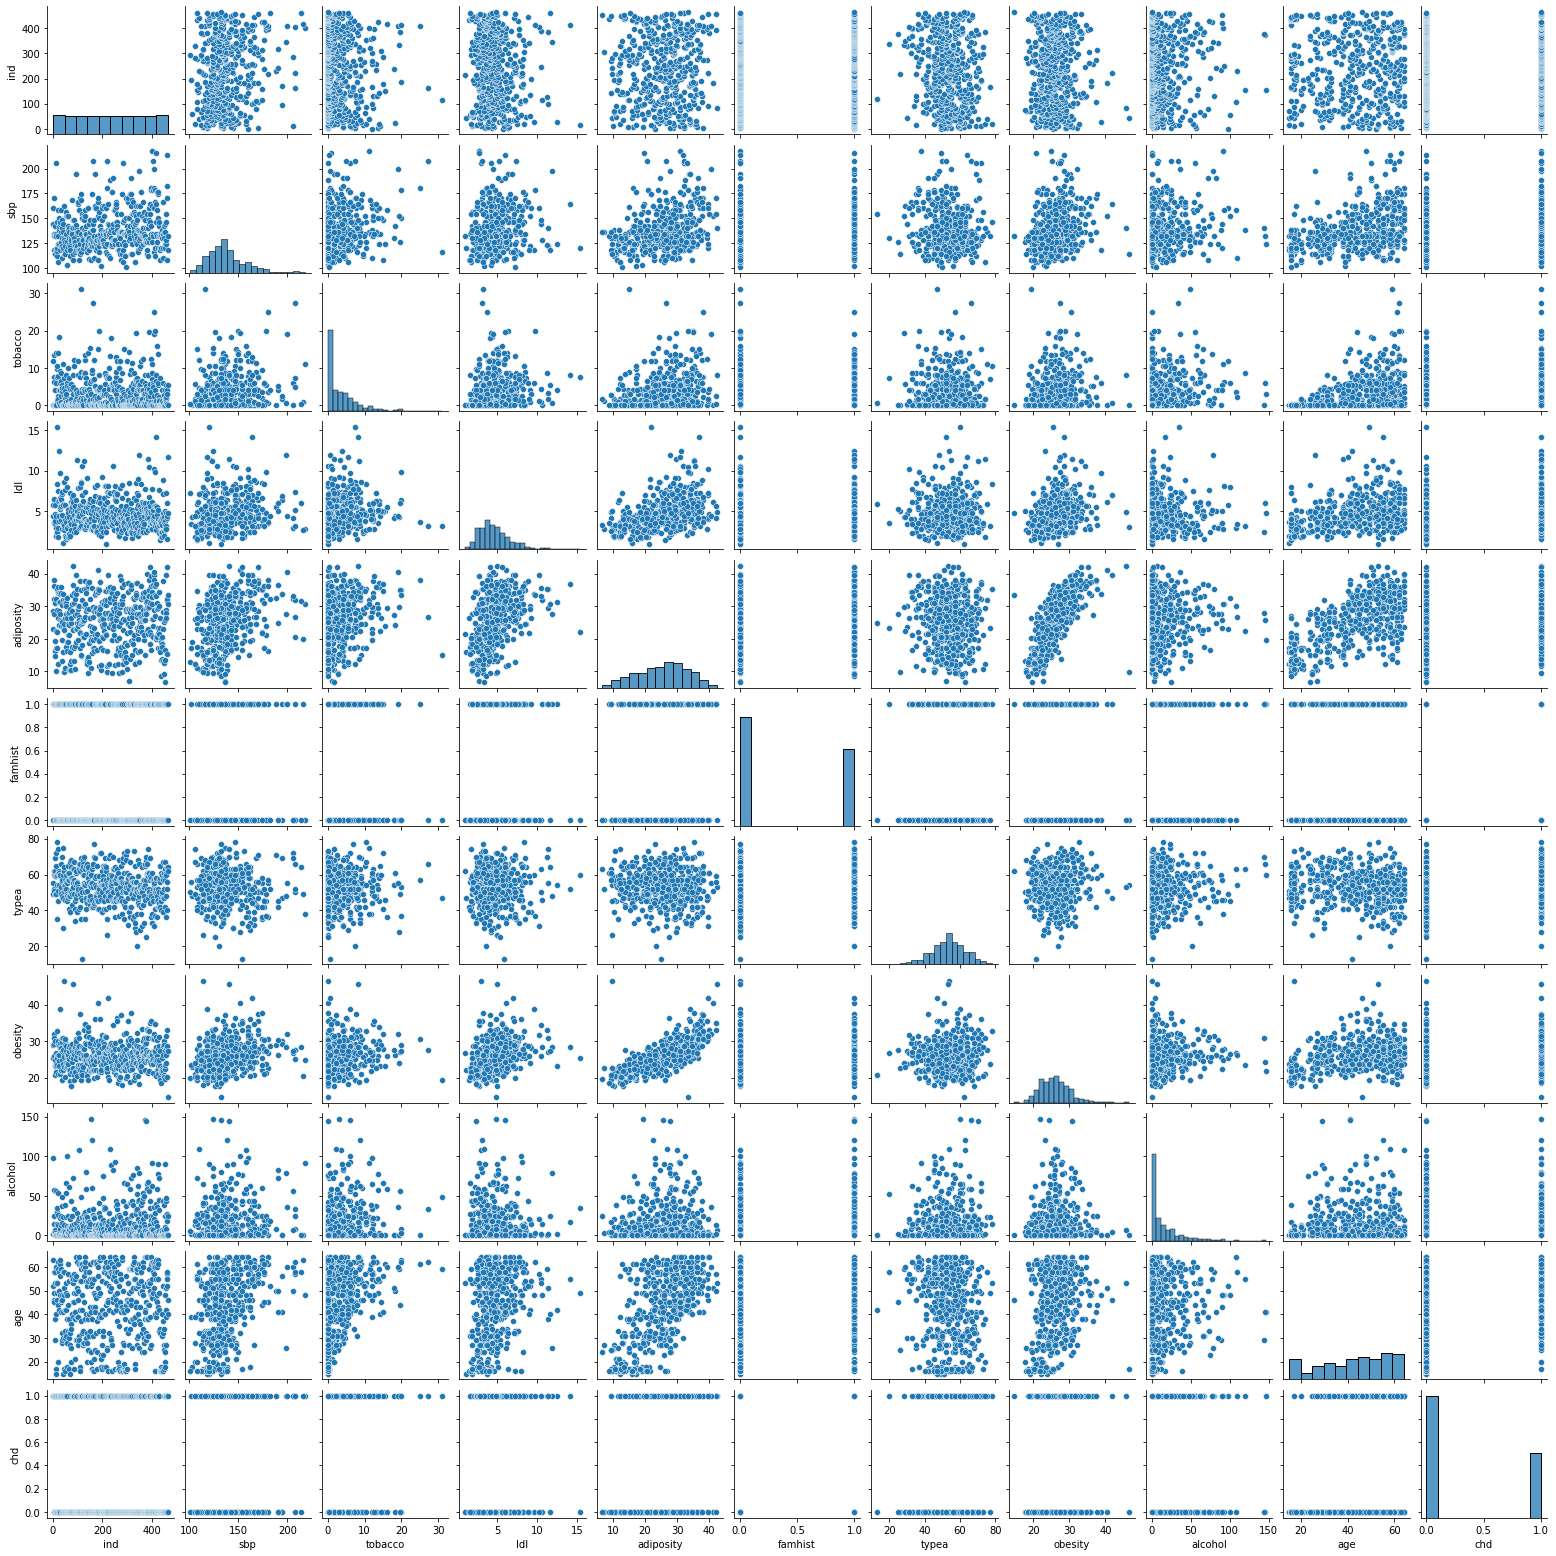

In [ ]:
sns.pairplot(df[features],height=2,kind='scatter')

In [ ]:
for column in df:
  sns.displot(x=column, data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


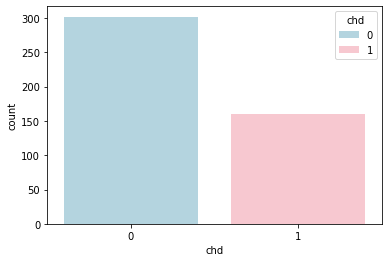

In [ ]:
sns.countplot(df['chd'],hue=df['chd'],palette=['lightblue','pink'],dodge=False)

In [ ]:
print(sorted(Counter(df['chd']).items()))

[(0, 302), (1, 160)]


In [ ]:
co=df.corr()
co['chd'].sort_values(ascending=False)

chd          1.000000
age          0.372973
tobacco      0.299718
famhist      0.272373
ldl          0.263053
adiposity    0.254121
sbp          0.192354
typea        0.103156
obesity      0.100095
alcohol      0.062531
ind         -0.063808
Name: chd, dtype: float64

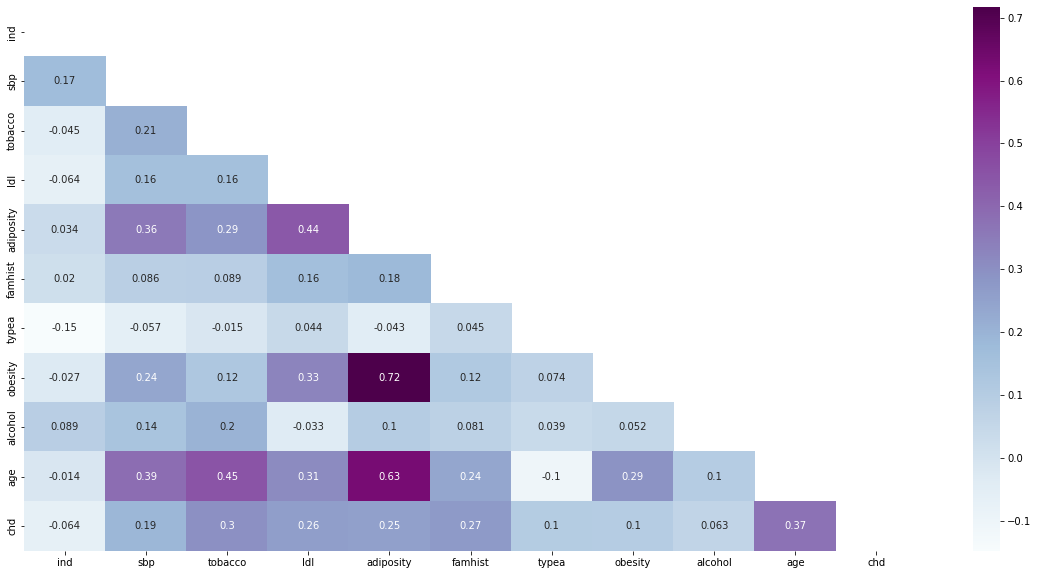

In [ ]:
plt.figure(figsize=(20,10))
lower=np.triu(co)
sns.heatmap(co,mask=lower,annot=True, cmap='BuPu')

In [ ]:
#Univariate
array=df.values
x=array[:,1:10]
y=array[:,-1]

test=SelectKBest(score_func=f_classif, k=8)
fit=test.fit(x,y)

print(fit.scores_)
features=fit.transform(x)
print(features)

[17.673987   45.40042458 34.19679469 31.75649409 36.8605446   4.94756521
  4.65539358  1.80569994 74.33019852]
[[1.600e+02 1.200e+01 5.730e+00 ... 4.900e+01 2.530e+01 5.200e+01]
 [1.440e+02 1.000e-02 4.410e+00 ... 5.500e+01 2.887e+01 6.300e+01]
 [1.180e+02 8.000e-02 3.480e+00 ... 5.200e+01 2.914e+01 4.600e+01]
 ...
 [1.080e+02 3.000e+00 1.590e+00 ... 4.000e+01 2.009e+01 5.500e+01]
 [1.180e+02 5.400e+00 1.161e+01 ... 6.400e+01 2.735e+01 4.000e+01]
 [1.320e+02 0.000e+00 4.820e+00 ... 6.200e+01 1.470e+01 4.600e+01]]


In [ ]:
array=df.values
x=array[:,1:10]
y=array[:,-1]
y=y.astype('int')
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=5)
fit=rfe.fit(x,y)

print('Number of features %d' % fit.n_features_)
print('Selected features %s' % fit.support_)
print('Rank of the F=features %s' %fit.ranking_)

Number of features 5
Selected features [False  True  True False  True  True False False  True]
Rank of the F=features [4 1 1 3 1 1 2 5 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
pca=PCA(n_components=5)
fit=pca.fit(x,y)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)
print(selector.variances_)

#print('Explained features %s' %fit.explained_variance_ratio_)
#print(fit.components_)

[117.          21.05020813   4.27938193  35.75         0.24287401
  65.          17.7166701  147.19        49.        ]


In [ ]:
model=ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.11492436 0.12568994 0.12169732 0.11996945 0.06957003 0.1027617
 0.08929605 0.1065566  0.14953455]


In [ ]:
x=df
y=df['chd']


In [ ]:
x.drop('chd',axis=1,inplace=True)

In [ ]:
ros=RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()))

[(0, 302), (1, 302)]


In [ ]:
df_1=x_resampled
df_1['chd']=y_resampled
df_1.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


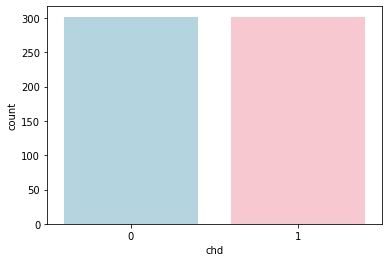

In [ ]:
sns.countplot(x=df_1['chd'],palette=['lightblue','pink'])

In [ ]:
df_uni = df_1[['tobacco','ldl','adiposity','famhist','age','chd']]
df_uni

,tobacco,ldl,adiposity,famhist,age,chd
0,12.00,5.73,23.11,1,52,1
1,0.01,4.41,28.61,0,63,1
2,0.08,3.48,32.28,1,46,0
3,7.50,6.41,38.03,1,58,1
4,13.60,3.50,27.78,1,49,1
...,...,...,...,...,...,...
599,8.40,3.57,13.68,0,59,1
600,7.60,5.50,37.83,1,54,1
601,3.00,9.19,26.47,1,54,1
602,4.26,4.44,13.04,0,28,1


In [ ]:
df_lr = df_1[['tobacco','ldl','famhist','typea','age','chd']]
df_lr

,tobacco,ldl,famhist,typea,age,chd
0,12.00,5.73,1,49,52,1
1,0.01,4.41,0,55,63,1
2,0.08,3.48,1,52,46,0
3,7.50,6.41,1,51,58,1
4,13.60,3.50,1,60,49,1
...,...,...,...,...,...,...
599,8.40,3.57,0,42,59,1
600,7.60,5.50,1,42,54,1
601,3.00,9.19,1,39,54,1
602,4.26,4.44,0,57,28,1


In [ ]:
df_pca = df_1[['sbp','adiposity','typea','alcohol','age','chd']]
df_pca

,sbp,adiposity,typea,alcohol,age,chd
0,160,23.11,49,97.20,52,1
1,144,28.61,55,2.06,63,1
2,118,32.28,52,3.81,46,0
3,170,38.03,51,24.26,58,1
4,134,27.78,60,57.34,49,1
...,...,...,...,...,...,...
599,132,13.68,42,15.43,59,1
600,170,37.83,42,6.17,54,1
601,160,26.47,39,14.40,54,1
602,122,13.04,57,48.99,28,1


In [ ]:
df_etc = df_1[['sbp','tobacco','ldl','typea','age','chd']]
df_etc

,sbp,tobacco,ldl,typea,age,chd
0,160,12.00,5.73,49,52,1
1,144,0.01,4.41,55,63,1
2,118,0.08,3.48,52,46,0
3,170,7.50,6.41,51,58,1
4,134,13.60,3.50,60,49,1
...,...,...,...,...,...,...
599,132,8.40,3.57,42,59,1
600,170,7.60,5.50,42,54,1
601,160,3.00,9.19,39,54,1
602,122,4.26,4.44,57,28,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

#Machine Learning: Univariate Selection

In [ ]:
array_uni =df_uni.values
X= array_uni[:,0:5]
y = array_uni[:,5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,5,0.747699
1,6,0.739099
2,1,0.738251
3,7,0.734859
4,8,0.732074
5,3,0.730257
6,26,0.728682
7,35,0.728077
8,13,0.724443
9,4,0.724079


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[65 21]
 [25 71]]
Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74        86
         1.0       0.77      0.74      0.76        96

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182

Accuracy Score
0.7472527472527473


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[64 22]
 [24 72]]
0.7472527472527473
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74        86
         1.0       0.77      0.75      0.76        96

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[59 27]
 [24 72]]
0.7197802197802198
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        86
         1.0       0.73      0.75      0.74        96

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182



#Machine Learning: Logistics Regression

In [ ]:
array_lr =df_lr.values
X1= array_lr[:,0:5]
y1 = array_lr[:,5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,42,0.752907
1,39,0.746487
2,41,0.746487
3,9,0.744671
4,37,0.741279
5,22,0.738493
6,36,0.736676
7,38,0.736676
8,34,0.736676
9,40,0.736071


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[65 21]
 [24 72]]
Classification report
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74        86
         1.0       0.77      0.75      0.76        96

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182

Accuracy Score
0.7527472527472527


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[57 29]
 [24 72]]
0.7087912087912088
              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68        86
         1.0       0.71      0.75      0.73        96

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[60 26]
 [25 71]]
0.7197802197802198
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70        86
         1.0       0.73      0.74      0.74        96

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182



#Machine Learning: PCA

In [ ]:
array_pca =df_pca.values
X2= array_pca[:,0:5]
y2 = array_pca[:,5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.709181
1,11,0.706032
2,10,0.702641
3,26,0.687984
4,21,0.687984
5,12,0.686410
6,14,0.685199
7,9,0.683382
8,15,0.682776
9,16,0.679990


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[53 33]
 [19 77]]
Classification report
              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67        86
         1.0       0.70      0.80      0.75        96

    accuracy                           0.71       182
   macro avg       0.72      0.71      0.71       182
weighted avg       0.72      0.71      0.71       182

Accuracy Score
0.7142857142857143


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[86  0]
 [42 54]]
0.7692307692307693
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        86
         1.0       1.00      0.56      0.72        96

    accuracy                           0.77       182
   macro avg       0.84      0.78      0.76       182
weighted avg       0.84      0.77      0.76       182



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[52 34]
 [27 69]]
0.6648351648351648
              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63        86
         1.0       0.67      0.72      0.69        96

    accuracy                           0.66       182
   macro avg       0.66      0.66      0.66       182
weighted avg       0.66      0.66      0.66       182



#Machine Learning: Decision Tree

In [ ]:
array_etc =df_etc.values
X3= array_etc[:,0:5]
y3 = array_etc[:,5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.763929
1,34,0.708212
2,36,0.703004
3,32,0.702398
4,33,0.702398
5,30,0.702398
6,46,0.702398
7,44,0.696584
8,35,0.696584
9,48,0.696584


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[66 20]
 [23 73]]
Classification report
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75        86
         1.0       0.78      0.76      0.77        96

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182

Accuracy Score
0.7637362637362637


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[86  0]
 [41 55]]
0.7747252747252747
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        86
         1.0       1.00      0.57      0.73        96

    accuracy                           0.77       182
   macro avg       0.84      0.79      0.77       182
weighted avg       0.85      0.77      0.77       182



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[58 28]
 [29 67]]
0.6868131868131868
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        86
         1.0       0.71      0.70      0.70        96

    accuracy                           0.69       182
   macro avg       0.69      0.69      0.69       182
weighted avg       0.69      0.69      0.69       182



#Machine Learning: Original Datasets

In [ ]:
del df_1['ind']

In [ ]:
df_1

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
599,132,8.40,3.57,13.68,0,42,18.75,15.43,59,1
600,170,7.60,5.50,37.83,1,42,37.41,6.17,54,1
601,160,3.00,9.19,26.47,1,39,28.25,14.40,54,1
602,122,4.26,4.44,13.04,0,57,19.49,48.99,28,1


In [ ]:
array_ori=df_1.values
X4= array_ori[:,0:9]
y4= array_ori[:,9]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size = 0.3, random_state=1)

In [ ]:
tt = {}
il = []
ac = []

for i in range (1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  
  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  tt.update({'K': il})
  tt.update({'ROC_AUC':ac})

In [ ]:
kk = pd.DataFrame(tt)
kk.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
kk.head(10)

,K,ROC_AUC
0,1,0.723232
1,15,0.717660
2,13,0.712452
3,12,0.709060
4,17,0.707849
5,14,0.703246
6,26,0.700824
7,11,0.700824
8,18,0.698038
9,10,0.698038


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [ ]:
results=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(results)

results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)

results2=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(results2)

Confusion Matrix
[[59 27]
 [23 73]]
Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70        86
         1.0       0.73      0.76      0.74        96

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.73      0.73      0.72       182

Accuracy Score
0.7252747252747253


In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[86  0]
 [41 55]]
0.7747252747252747
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        86
         1.0       1.00      0.57      0.73        96

    accuracy                           0.77       182
   macro avg       0.84      0.79      0.77       182
weighted avg       0.85      0.77      0.77       182



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
y_predict1

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.])

In [ ]:
results6=confusion_matrix(y_test,y_predict1)
print(results6)

results7=accuracy_score(y_test,y_predict1)
print(results7)

results8=classification_report(y_test, y_predict1)
print(results8)

[[62 24]
 [26 70]]
0.7252747252747253
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71        86
         1.0       0.74      0.73      0.74        96

    accuracy                           0.73       182
   macro avg       0.72      0.73      0.72       182
weighted avg       0.73      0.73      0.73       182

